Copyright (c) <2022>, <Regina Nockerts>
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

In [1]:

import pandas as pd
import numpy as np
import os.path
from nlpUtils import aardvark as aa 
from numpy import random as rand
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

# Load the Data
First load the data from csv that was created in the labelData notebook.


# Look for imbalanced classes

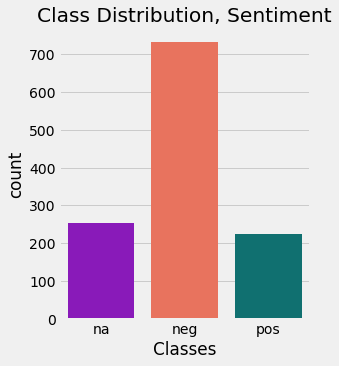

In [14]:
#plot class distribution
plt.figure(figsize=(4, 5))
plot_colors = ['darkviolet','tomato', 'teal']
sns.countplot(x=tweets_clean["y_sent"], palette=plot_colors).set_xticklabels(["na", "neg", "pos"])
plt.xlabel('Classes')
plt.title('Class Distribution, Sentiment');

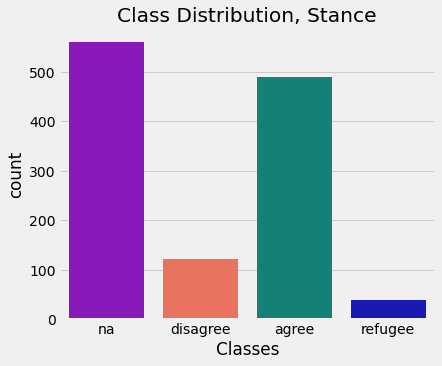

In [15]:
#plot class distribution
plt.figure(figsize=(6, 5))
plot_colors = ['darkviolet', 'tomato', 'xkcd:teal', 'mediumblue']
sns.countplot(x=tweets_clean["y_stance"], palette=plot_colors).set_xticklabels(["na", "disagree", "agree", "refugee"])
plt.xlabel('Classes')
plt.title('Class Distribution, Stance');

### Dealing with Imbalanced Data
So we have imbalanced classes in both categories: far more negative than positive/neutral tweets, for fewer disaggree than agree/neutral tweets. 

We will need to deal with that before using machine learning algorithms, or the models will simply learn to predict the majority class. This will be a problem we need to address in the __training__ and __validation__ sets for ML. 

IN ADDITION: remember that our evaluation metric will be __F1 and AUC__. Create a confusion matrix.

### Tweet Length

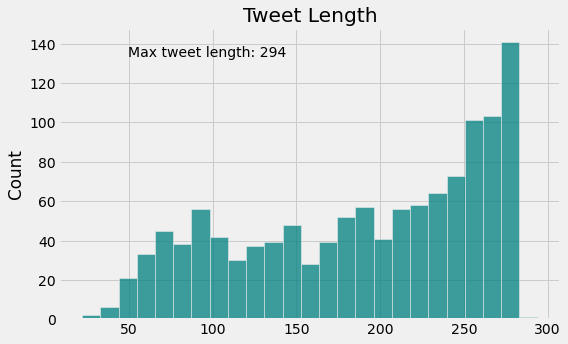

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot([len(s) for s in tweets_clean["ContentClean"]], bins=25, color="teal")
plt.figtext(.2, .8, "Max tweet length, charaters: {}".format(max([len(s) for s in tweets_clean["ContentClean"]])))
plt.title('Tweet Length')
plt.show()

### PAUSE / UNPAUSE

In [17]:
# PAUSE
tweets_clean.to_csv(os.path.join('archiveData', "temp_tweets_clean.csv"))

# UNPAUSE
# tweets_clean = pd.read_csv(os.path.join('archiveData', "temp_tweets_clean.csv"), header=0, index_col=0)

# Split the Dataset

In [18]:
# Find column names
print(list(tweets_clean.columns))

['id_stable', 'Date', 'Content', 'ContentClean', 'Labels', 'label_sent', 'y_sent', 'label_stance', 'y_stance', 'n_CapLetters', 'CapsRatio', 'AllCapWords', 'https', 'Mentions', 'Location', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Hashtags', 'Flag']


In [19]:
#split x and y columns
x_data_list = ['id_stable', 'Date', 'Content', 'ContentClean', 'n_CapLetters', 'CapsRatio', 'AllCapWords', 'https', 'Mentions', 'Location', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Hashtags']
y_sent_list = ['id_stable', 'y_sent']
y_stance_list = ['id_stable', 'y_stance']

x_data = tweets_clean[x_data_list].copy()
print(x_data.shape)

y_sent = tweets_clean[y_sent_list].copy()
print(y_sent.shape)

y_stance = tweets_clean[y_stance_list].copy()
print(y_stance.shape)


(1061, 15)
(1061, 2)
(1061, 2)


### CHECK THIS!!! _______________
stratify: in train_test_split: StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

This is an option to try if I get bad results with downsampling.

### Train/Test split

In [20]:
x_train, x_val, y_train_sent, y_val_sent = train_test_split(x_data, y_sent, test_size = 0.3, random_state = 1018, stratify = y_sent.y_sent.values)
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("y_train_sent:", y_train_sent.shape)
print("y_val_sent:", y_val_sent.shape)

# x_train, x_val, y_train_sent, y_val_sent = train_test_split(x_data, y_sent, test_size = 0.2, random_state = 1018, stratify = tweets_clean.label.values)


x_train: (742, 15)
x_val: (319, 15)
y_train_sent: (742, 2)
y_val_sent: (319, 2)


# Save Clean, Split Files
For use with dictionary models: VADER, TextBlob

In [21]:
x_train.to_csv(os.path.join('data', "x_train.csv"))
x_val.to_csv(os.path.join('data', "x_val.csv"))
y_train_sent.to_csv(os.path.join('data', "y_train_sent.csv"))
y_val_sent.to_csv(os.path.join('data', "y_val_sent.csv"))

But I'm also going to need access to the complete sets, sooo...

In [22]:
data_unlabeled = pd.read_csv(os.path.join('data', "data_unlabeled2_05_09.csv"), header=0, index_col=0)
print(data_unlabeled.shape)
print(list(data_unlabeled.columns))

(200084, 16)
['id_stable', 'Date', 'Content', 'ContentClean', 'n_CapLetters', 'CapsRatio', 'AllCapWords', 'https', 'Mentions', 'Location', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Hashtags', 'Flag']


In [ ]:
bad_cols = ['n_CapLetters', 'CapsRatio', 'AllCapWords', 'https', 'Mentions', 'Location', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Hashtags']
data_unlabeled.drop(bad_cols, axis=1, inplace=True)
aa.last_clean (data_unlabeled, text_col="ContentClean", indx_warning=False, verby=True)


In [24]:
tweets_clean.to_csv(os.path.join('data', "all_labeled_tweets.csv"))
data_unlabeled.to_csv(os.path.join('data', "all_unlabeled_tweets.csv"))